# Определение перспективного тарифа для телеком компании

Описание проекта
Нужно проанализировать «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 
- Цель работы: Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Содержание
###  [Шаг 1. Введние](#введение)
###  [Шаг 2. Предобработка данных](#шаг2)
###  [Шаг 3. Анализ данных](#шаг3)
###  [Шаг 4. Проверка гипотез](#шаг4)
###  [Шаг 5. Вывод](#шаг5)

# Шаг 1. Введние
<a id='введение'></a>

Импортируем необходимые бибилиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib import pyplot as plt
from scipy import stats as st
from scipy.stats import norm
import math as mt
import math

Дадим имена нашим данным в соответсвии с содержанием в них данных, напр., данные со звонками назовем df_calls:

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

Теперь посмотрим на все имеющиеся датасеты через цикл, чтобы примерно понимать с чем необходимо будет работать:

In [3]:
for data in [df_calls, df_internet, df_messages, df_tariffs , df_users]:
    display(data)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [4]:
for data in [df_calls, df_internet, df_messages, df_tariffs , df_users]:
    print(data.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None

<class 'pandas.core.fram

Кол-во строк в датафрймах разное, пропущенных значений практически нет.

In [5]:
for data in [df_calls, df_internet, df_messages, df_tariffs , df_users]:
    print((data.isna().sum()), end='\n\n')

id           0
call_date    0
duration     0
user_id      0
dtype: int64

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

id              0
message_date    0
user_id         0
dtype: int64

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64



# Вывод

В столбце churn_date пропущенно порядка 462 значения, этот столбец расшифровывается следующим образом: дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных), т.е. пользователь пользуется тарифом, а остальные 38 уже нет. Поэтому, скорее всего, здесь мы оставим все без изменений.
Однозначно необходимо поработать со столбцами duration и mb_used — длительность звонка в минутах, они идут как минуты с секундами, но условия такие: "«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.", т.о. необходимо округлить минуты и мегабайты в большую сторону.
Столбцы call_date, message_date, reg_date, session_date переведем в другой тип данных, а именно в datetime.

# Шаг 2. Предобработка данных
<a id='шаг2'></a>

Заменим типы данных:

In [6]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

Проверка:

In [7]:
for data in [df_calls, df_internet, df_messages, df_tariffs , df_users]:
    print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[n

Теперь разберемся со столбцами duration и mb_used: округлим их значения в большую сторону и сразу переведем в целочисленные значения:

In [8]:
df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)
df_internet['mb_used'] = np.ceil(df_internet['mb_used']).astype(int)

In [9]:
display(df_calls)
display(df_internet)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113,2018-11-25,1000
1,1,1000_1,1053,2018-09-07,1000
2,2,1000_2,1198,2018-06-25,1000
3,3,1000_3,551,2018-08-22,1000
4,4,1000_4,303,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,319,2018-10-03,1499
149392,149392,1499_153,491,2018-12-14,1499
149393,149393,1499_154,0,2018-10-27,1499
149394,149394,1499_155,1247,2018-11-26,1499


Стоит обратить внимание на столбец duration - есть нулевые значения, скорее всего этот вызов не произошел - абонент просто не дозвонился до нужного ему человека. Узнаем сколько у нас этих нулевых значения. Если их очень мало, то могу предложить их удалить.

In [10]:
df_calls.query('duration == 0')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
9,1000_9,2018-08-15,0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0,1499
202592,1499_205,2018-10-13,0,1499
202593,1499_206,2018-12-26,0,1499
202594,1499_207,2018-10-28,0,1499


Выходит порядка 39тыс строк - слишком много недозвонов, оставим их и для дальнейших исследований.

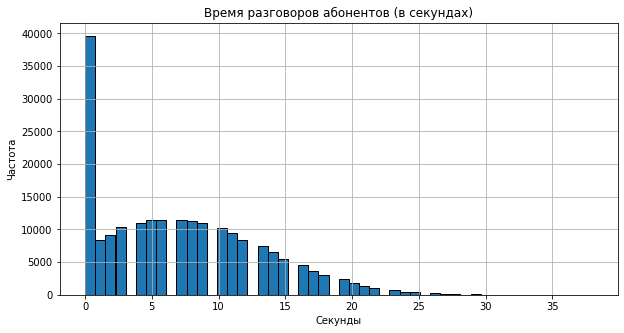

In [11]:
df_calls['duration'].hist(bins=50, figsize=(10,5), ec='black')
plt.title('Время разговоров абонентов (в секундах)')
plt.xlabel('Секунды')
plt.ylabel('Частота')
plt.show()

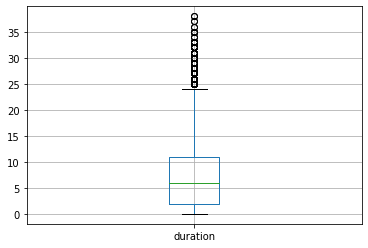

In [12]:
df_calls.boxplot('duration')

Итак, очень много не произошедших вызовов, медианное время разговора примерно 6-7 секунд, мало кто разговаривает больше 20 секунд.

Теперь можно попробовать удалить наши недозвоны и посмотреть как изменятся данные - ведь 0 секунд не влияет на оплату.

,id,call_date,duration,user_id
0,1000_0,2018-07-25,NaN,1000
1,1000_1,2018-08-17,NaN,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


,id,call_date,duration,user_id
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


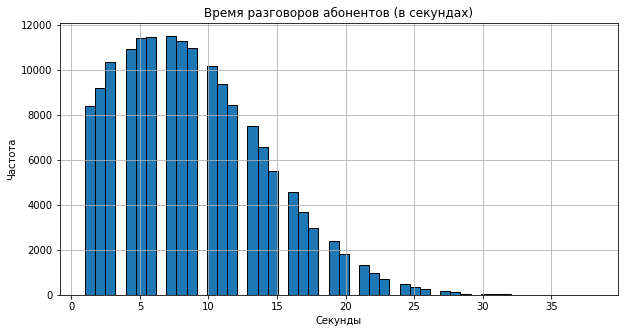

In [13]:
df_calls['duration'] = df_calls['duration'].replace(0, np.NaN)
display(df_calls)
#Удаляем наны
df_calls = df_calls.dropna()
display(df_calls)
df_calls['duration'].hist(bins=50, figsize=(10,5), ec='black')
plt.title('Время разговоров абонентов (в секундах)')
plt.xlabel('Секунды')
plt.ylabel('Частота')
plt.show()

Проделаем все то же самое с датафреймом df_internet, т.к. здесь также есть нулевые значения в столбце mb_used

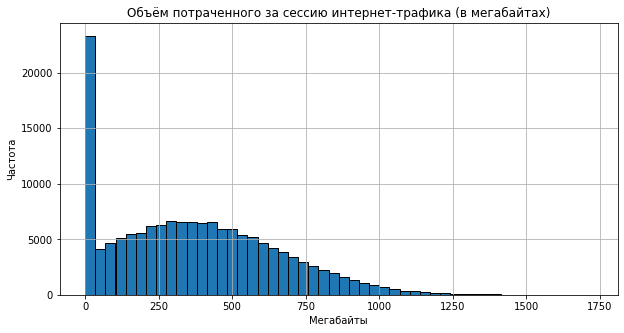

In [14]:
df_internet['mb_used'].hist(bins=50, figsize=(10,5), ec='black')
plt.title('Объём потраченного за сессию интернет-трафика (в мегабайтах)')
plt.xlabel('Мегабайты')
plt.ylabel('Частота')
plt.show()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.0,2018-11-25,1000
1,1,1000_1,1053.0,2018-09-07,1000
2,2,1000_2,1198.0,2018-06-25,1000
3,3,1000_3,551.0,2018-08-22,1000
4,4,1000_4,303.0,2018-09-24,1000
...,...,...,...,...,...
149390,149390,1499_151,753.0,2018-10-11,1499
149391,149391,1499_152,319.0,2018-10-03,1499
149392,149392,1499_153,491.0,2018-12-14,1499
149394,149394,1499_155,1247.0,2018-11-26,1499


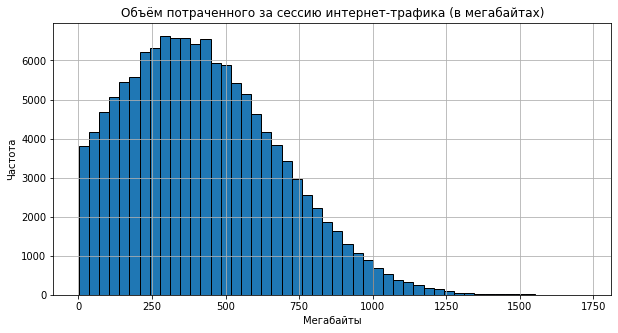

In [15]:
#заменяем нули на наны
df_internet['mb_used'] = df_internet['mb_used'].replace(0, np.NaN)
#Удаляем наны
df_internet = df_internet.dropna()
display(df_internet)
#сразу строим гистограмму без нулевых значений
df_internet['mb_used'].hist(bins=50, figsize=(10,5), ec='black')
plt.title('Объём потраченного за сессию интернет-трафика (в мегабайтах)')
plt.xlabel('Мегабайты')
plt.ylabel('Частота')
plt.show()

Теперь посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам. Для этого необходимо будет вывести дополнительный столбец с месяцами.

In [16]:
#добавляем новый столбец с месяцами
df_calls['month'] = df_calls['call_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month


Посчитаем сколько каждый отдельно взятый пользователь наговорил в минутах и сколько раз он в целом звонил кому либо:

In [17]:
df_calls_grouped = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'])

In [18]:
display(df_calls_grouped)

sum    count
              duration duration
user_id month                  
1000    5        159.0       17
        6        172.0       28
        7        340.0       41
        8        408.0       42
        9        466.0       46
...                ...      ...
1498    10       247.0       30
1499    9         70.0        8
        10       449.0       44
        11       612.0       62
        12       492.0       56

[3168 rows x 2 columns]

Посчитаем теперь сколько сообщений отправил каждый пользователь по каждому месяцу:

In [19]:
df_messages_grouped = df_messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc=['sum', 'count'])
display(df_messages_grouped)

count
              message_date
user_id month             
1000    5               22
        6               60
        7               75
        8               81
        9               57
...                    ...
1498    10              42
1499    9               11
        10              48
        11              59
        12              66

[2717 rows x 1 columns]

Теперь настало время объема израсходованного интернет-трафика по месяцам:

In [20]:
#посмотрим на df_internet
display(df_internet)
#добавим месяц выхода в интернет
df_internet['month'] = df_internet['session_date'].dt.month
display(df_internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.0,2018-11-25,1000
1,1,1000_1,1053.0,2018-09-07,1000
2,2,1000_2,1198.0,2018-06-25,1000
3,3,1000_3,551.0,2018-08-22,1000
4,4,1000_4,303.0,2018-09-24,1000
...,...,...,...,...,...
149390,149390,1499_151,753.0,2018-10-11,1499
149391,149391,1499_152,319.0,2018-10-03,1499
149392,149392,1499_153,491.0,2018-12-14,1499
149394,149394,1499_155,1247.0,2018-11-26,1499


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113.0,2018-11-25,1000,11
1,1,1000_1,1053.0,2018-09-07,1000,9
2,2,1000_2,1198.0,2018-06-25,1000,6
3,3,1000_3,551.0,2018-08-22,1000,8
4,4,1000_4,303.0,2018-09-24,1000,9
...,...,...,...,...,...,...
149390,149390,1499_151,753.0,2018-10-11,1499,10
149391,149391,1499_152,319.0,2018-10-03,1499,10
149392,149392,1499_153,491.0,2018-12-14,1499,12
149394,149394,1499_155,1247.0,2018-11-26,1499,11


In [21]:
df_internet_grouped = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum', 'count'])
display(df_internet_grouped)

sum   count
               mb_used mb_used
user_id month                 
1000    5       2256.0       4
        6      23257.0      44
        7      14016.0      28
        8      14070.0      27
        9      14581.0      25
...                ...     ...
1498    10     20604.0      49
1499    9       1848.0       4
        10     17809.0      43
        11     17984.0      39
        12     13077.0      40

[3201 rows x 2 columns]

Теперь объединим все эти таблицы в одну и дадим название df

Объединяем через merge

In [22]:
df = df_calls_grouped.merge(df_internet_grouped, on=['user_id', 'month'], how='outer').merge(df_messages_grouped, on=['user_id', 'month'], how='outer')

Смотрим что получилось. Первый столбец это уникальный номер пользователя, затем идет столбец с месяцами использования, затем столбец с суммарной длительностью звонков в минутах, затем сколько раз человек звонил в месяц, суммарное кол-во скачанных мегабайт, аналогично звонкам: сколько раз в месяц человек вышел в интернет и последний столбец - сколько сообщений в сумме за месяц было отправлено.

In [23]:
display(df.head(30))

sum    count      sum   count             
              duration duration  mb_used mb_used message_date
user_id month                                                
1000    5        159.0     17.0   2256.0     4.0         22.0
        6        172.0     28.0  23257.0    44.0         60.0
        7        340.0     41.0  14016.0    28.0         75.0
        8        408.0     42.0  14070.0    27.0         81.0
        9        466.0     46.0  14581.0    25.0         57.0
        10       350.0     44.0  14717.0    27.0         73.0
        11       338.0     37.0  14768.0    23.0         58.0
        12       333.0     38.0   9827.0    19.0         70.0
1001    11       430.0     45.0  18452.0    47.0          NaN
        12       414.0     47.0  14053.0    35.0          NaN
1002    6        117.0     14.0  10871.0    27.0          4.0
        7        214.0     21.0  17601.0    44.0         11.0
        8        289.0     37.0  20347.0    50.0         13.0
        9        206.0     25.0  16712.0    44.0          4.0
        10       212.0     24.0  13905.0    36.0         10.0
        11       243.0     25.0  18610.0    44.0         16.0
        12       236.0     27.0  18137.0    52.0         12.0
1003    8        380.0     43.0   8571.0    14.0         37.0
        9        961.0    105.0  12479.0    22.0         91.0
        10       855.0     97.0  14779.0    25.0         83.0
        11       824.0     95.0  11368.0    20.0         94.0
        12       802.0     88.0  10132.0    21.0         75.0
1004    5         35.0      7.0  13415.0    24.0         95.0
        6        171.0     25.0  17619.0    33.0        134.0
        7        135.0     20.0  22243.0    32.0        181.0
        8        137.0     18.0  28607.0    50.0        151.0
        9        117.0     18.0  15125.0    32.0        146.0
        10       145.0     21.0  18494.0    37.0        165.0
        11       117.0     15.0  15631.0    33.0        158.0
        12       130.0     15.0  18038.0    37.0        162.0

Имена столбцов выглядят на данный момент некрасиво, необходимо их переименовать:

In [24]:
df.columns = ['duration', 'calls_count', 'session_mb', 'session_count', 'messages']

Необходимым датафреймом для нас является df_users, где находятся важные для нас данные, такие как тариф, город, возраст человека и тд. Поэтому добавим df_users с помощью merge к df:

In [25]:
df = df.reset_index().merge(df_users)

In [26]:
display(df.head(20))

,user_id,month,duration,calls_count,session_mb,session_count,messages,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159.0,17.0,2256.0,4.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172.0,28.0,23257.0,44.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340.0,41.0,14016.0,28.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408.0,42.0,14070.0,27.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466.0,46.0,14581.0,25.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,10,350.0,44.0,14717.0,27.0,73.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,11,338.0,37.0,14768.0,23.0,58.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,12,333.0,38.0,9827.0,19.0,70.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1001,11,430.0,45.0,18452.0,47.0,NaN,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
9,1001,12,414.0,47.0,14053.0,35.0,NaN,41,NaN,Москва,Иван,Ежов,2018-11-01,smart


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 14 columns):
user_id          3214 non-null int64
month            3214 non-null int64
duration         3168 non-null float64
calls_count      3168 non-null float64
session_mb       3201 non-null float64
session_count    3201 non-null float64
messages         2717 non-null float64
age              3214 non-null int64
churn_date       187 non-null object
city             3214 non-null object
first_name       3214 non-null object
last_name        3214 non-null object
reg_date         3214 non-null datetime64[ns]
tariff           3214 non-null object
dtypes: datetime64[ns](1), float64(5), int64(3), object(5)
memory usage: 376.6+ KB


Теперь мы можем производить расчеты, строить гистограммы и все остальное, что в дальнейшем нам потребуется для анализа. Но сначала посмотрим, есть ли у нас пропущенные значения

In [28]:
print(df.isna().sum())

user_id             0
month               0
duration           46
calls_count        46
session_mb         13
session_count      13
messages          497
age                 0
churn_date       3027
city                0
first_name          0
last_name           0
reg_date            0
tariff              0
dtype: int64


Пропущенные значения есть, при всем при этом они как то взаимосвязаны, например, в столбце diration пропусков ровно столько же, сколько и в столбце calls_count, можно посмотреть на это через срезы

In [29]:
df.query('duration == "NaN"')

,user_id,month,duration,calls_count,session_mb,session_count,messages,age,churn_date,city,first_name,last_name,reg_date,tariff
1503,1240,2,NaN,NaN,961.0,3.0,NaN,30,NaN,Воронеж,Зинаида,Шарова,2018-02-27,ultra
1608,1257,7,NaN,NaN,20034.0,40.0,146.0,21,NaN,Санкт-Петербург,Габриель,Жданов,2018-06-17,ultra
1609,1257,8,NaN,NaN,25506.0,48.0,157.0,21,NaN,Санкт-Петербург,Габриель,Жданов,2018-06-17,ultra
1610,1257,9,NaN,NaN,22777.0,43.0,153.0,21,NaN,Санкт-Петербург,Габриель,Жданов,2018-06-17,ultra
2327,1373,1,NaN,NaN,9184.0,19.0,28.0,34,NaN,Улан-Удэ,Нелли,Афанасенко,2018-01-17,smart
2328,1373,4,NaN,NaN,20399.0,53.0,48.0,34,NaN,Улан-Удэ,Нелли,Афанасенко,2018-01-17,smart
2329,1373,6,NaN,NaN,12457.0,34.0,48.0,34,NaN,Улан-Удэ,Нелли,Афанасенко,2018-01-17,smart
3039,1476,4,NaN,NaN,531.0,1.0,NaN,50,NaN,Москва,Валентина,Семенова,2018-04-30,ultra
3176,1091,5,NaN,NaN,10714.0,22.0,30.0,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra
3177,1091,6,NaN,NaN,10245.0,18.0,30.0,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra


Видно, что абонент скорее всего никуда не звонит, он не тратит минуты и соответственно у него кол-во звонков нет, скорее всего можно будет наны заменить на нули. Стоит обратить внимание, что у многих тариф ultra (а в ультре дано 30гб интернета) и у многих кол-во скачанных мегабайт превышает 15000. Теперь также посмотрим и на session_mb, похоже, что там такая же история: люди просто не пользуются интернетом:

In [30]:
df.query('session_mb == "NaN"')

,user_id,month,duration,calls_count,session_mb,session_count,messages,age,churn_date,city,first_name,last_name,reg_date,tariff
584,1094,5,107.0,12.0,NaN,NaN,3.0,37,NaN,Новосибирск,Даниэла,Пугачева,2018-05-28,ultra
1697,1273,5,220.0,19.0,NaN,NaN,21.0,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra
1698,1273,6,230.0,28.0,NaN,NaN,38.0,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra
1699,1273,7,253.0,30.0,NaN,NaN,37.0,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra
1700,1273,8,253.0,39.0,NaN,NaN,41.0,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra
1701,1273,9,223.0,28.0,NaN,NaN,32.0,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra
1702,1273,10,315.0,35.0,NaN,NaN,35.0,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra
1703,1273,11,272.0,31.0,NaN,NaN,29.0,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra
1704,1273,12,260.0,38.0,NaN,NaN,39.0,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra
2278,1365,10,43.0,5.0,NaN,NaN,1.0,38,NaN,Ростов-на-Дону,Георгий,Вишняков,2018-10-31,smart


Возможно человек пользуется всем остальным, но в интернет не выходит, может быть неправильно выгружаются данные (тут нужно спросить корректно ли все отправлено), а может быть и правда людям не нужен интернет, но тогда зачем им самый дорогой тариф...
Наны также есть и в сообщениях, предпочту пока оставить их в покое, потом сравню сильно ли это повлияет на графики с нулевыми значениями. В общем, все наны заменяем на нули (кроме сообщений), их не так уж и много будет, данные сильно не исказятся, приступим:

In [31]:
df['duration'] = df['duration'].fillna(0).astype('int')
df['calls_count'] = df['calls_count'].fillna(0).astype('int')
#мегабайты переведем в гигабайты
df['session_mb'] = df['session_mb'].fillna(0)
df['session_count'] = df['session_count'].fillna(0).astype('int')
#добавляем новый столбец с округленными гигабайтами
df['session_gb'] = df['session_mb'].apply(np.ceil).astype('int')
df['messages'] = df['messages'].fillna(0)

In [32]:
display(df.head(20))

,user_id,month,duration,calls_count,session_mb,session_count,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,session_gb
0,1000,5,159,17,2256.0,4,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2256
1,1000,6,172,28,23257.0,44,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23257
2,1000,7,340,41,14016.0,28,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14016
3,1000,8,408,42,14070.0,27,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14070
4,1000,9,466,46,14581.0,25,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14581
5,1000,10,350,44,14717.0,27,73.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14717
6,1000,11,338,37,14768.0,23,58.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14768
7,1000,12,333,38,9827.0,19,70.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9827
8,1001,11,430,45,18452.0,47,0.0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,18452
9,1001,12,414,47,14053.0,35,0.0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,14053


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 15 columns):
user_id          3214 non-null int64
month            3214 non-null int64
duration         3214 non-null int64
calls_count      3214 non-null int64
session_mb       3214 non-null float64
session_count    3214 non-null int64
messages         3214 non-null float64
age              3214 non-null int64
churn_date       187 non-null object
city             3214 non-null object
first_name       3214 non-null object
last_name        3214 non-null object
reg_date         3214 non-null datetime64[ns]
tariff           3214 non-null object
session_gb       3214 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(7), object(5)
memory usage: 401.8+ KB


Сделаем небольшие выводы: у churn_date есть пропущенные значения, здесь все понятно - если вывести info() по таблице, то выйдет, что из 3000тыс строк у нас заполнены тут только 187, т.е. остальные люди пользуются тарифами, другие же просто отключились. Так больше нигде пропущенных значений у нас нет, можно двигаться дальше.
Теперь необходимо вычислить для каждого пользователя сколько в месяц он платит, воспользуемся нашим условием


Условия:
Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей
Посчитайте для каждого пользователя помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [34]:
def month_calc(row):
    calls = row['duration']
    messages = row['messages']
    internet = row['session_mb']
    tariff = row['tariff']
   
    # достанем лимиты по тарифам на звонки, смс и интернет
    minutes_lim = df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'minutes_included'].array[0]
    messages_lim = df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'messages_included'].array[0]
    internet_lim = df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'mb_per_month_included'].array[0]
    #тут аналогично лимиты по смскам
    #тут по интернету
   
    # переплата по звонкам
    call_overlimit = max(calls - minutes_lim, 0)
    call_overpay = call_overlimit * df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'rub_per_minute'].array[0]
   
    # переплата по сообщениям
    messages_overlimit = max(messages - messages_lim, 0)
    messages_overpay = messages_overlimit * df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'rub_per_message'].array[0]
   
    # переплата за трафик интернета
    internet_overlim = max(internet - internet_lim, 0)
    internet_overpay = (internet_overlim/1024) * df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'rub_per_gb'].array[0]
    
    
    over_pay = (call_overpay + messages_overpay + internet_overpay + df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'rub_monthly_fee'].array[0])
    return over_pay
 

df['over_pay'] = df.apply(month_calc, axis=1)

In [35]:
df['session_gb'] = np.ceil(df['session_gb']/1024).astype('int')
df['over_pay'] = df['over_pay'].astype('int')

In [36]:
display(df.head())

,user_id,month,duration,calls_count,session_mb,session_count,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,session_gb,over_pay
0,1000,5,159,17,2256.0,4,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3,1950
1,1000,6,172,28,23257.0,44,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23,1950
2,1000,7,340,41,14016.0,28,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14,1950
3,1000,8,408,42,14070.0,27,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14,1950
4,1000,9,466,46,14581.0,25,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15,1950


In [37]:
#выведем данные по каждому пользователю 
df.pivot_table(index=['user_id', 'age', 'city', 'tariff', 'reg_date', 'churn_date', 'month'])

calls_count  \
user_id age city        tariff reg_date   churn_date month                
1019    63  Томск       ultra  2018-05-16 2018-10-05 5               31   
                                                     6               43   
                                                     7               49   
                                                     8               34   
                                                     9               59   
...                                                                 ...   
1480    29  Новокузнецк smart  2018-02-14 2018-09-26 9               43   
1498    68  Владикавказ smart  2018-07-19 2018-10-25 7               20   
                                                     8               43   
                                                     9               53   
                                                     10              30   

                                                            duration  \
user_id age city        tariff reg_date   churn_date month             
1019    63  Томск       ultra  2018-05-16 2018-10-05 5           300   
                                                     6           386   
                                                     7           453   
                                                     8           360   
                                                     9           519   
...                                                              ...   
1480    29  Новокузнецк smart  2018-02-14 2018-09-26 9           305   
1498    68  Владикавказ smart  2018-07-19 2018-10-25 7           175   
                                                     8           400   
                                                     9           471   
                                                     10          247   

                                                            messages  \
user_id age city        tariff reg_date   churn_date month             
1019    63  Томск       ultra  2018-05-16 2018-10-05 5          21.0   
                                                     6          25.0   
                                                     7          16.0   
                                                     8          19.0   
                                                     9          21.0   
...                                                              ...   
1480    29  Новокузнецк smart  2018-02-14 2018-09-26 9          19.0   
1498    68  Владикавказ smart  2018-07-19 2018-10-25 7          20.0   
                                                     8          62.0   
                                                     9          44.0   
                                                     10         42.0   

                                                            over_pay  \
user_id age city        tariff reg_date   churn_date month             
1019    63  Томск       ultra  2018-05-16 2018-10-05 5          1950   
                                                     6          1950   
                                                     7          1950   
                                                     8          1950   
                                                     9          1950   
...                                                              ...   
1480    29  Новокузнецк smart  2018-02-14 2018-09-26 9           550   
1498    68  Владикавказ smart  2018-07-19 2018-10-25 7           550   
                                                     8          2326   
                                                     9          1879   
                                                     10         1574   

                                                            session_count  \
user_id age city        tariff reg_date   churn_date month                  
1019    63  Томск       ultra  2018-05-16 2018-10-05 5                 20   
                                          

Хотелось бы еще добавить несколько столбцов: все таки, думаю, сколько платит пользователь в месяц может быть не достаточно, хочется видеть на сколько он превысил лимит и за что человек будет дополнительно платить. Поэтому добавим 3 столбца over_messg - перерасход смс, over_minutes - перерасход минут, over_gb - перерасход гигабайт.

In [38]:
def over_messg(row):
    if row['tariff'] == 'smart':
        if row['messages'] > 50:
            over_messgs = row['messages'] - 50
        else:
            over_messgs = 0
    if row['tariff'] == 'ultra':
        if row['messages'] >1000:
            over_messgs = row['messages'] - 1000
        else:
            over_messgs = 0
    return over_messgs
df['over_messgs'] = df.apply(over_messg, axis=1)
df['over_messgs'].fillna(0)


def over_minutes(row):
    if row['tariff'] == 'smart':
        if row['duration'] > 500:
            over_call = row['duration'] - 500
        else:
            over_call = 0
    if row['tariff'] == 'ultra':
        if row['messages'] > 3000:
            over_call = row['messages'] - 3000
        else:
            over_call = 0
    return over_call
df['over_minutes'] = df.apply(over_minutes, axis=1)
df['over_minutes'].fillna(0)


def over_gb(row):
    if row['tariff'] == 'smart':
        if row['session_gb'] > 15:
            over_internet = row['session_gb'] - 15
        else:
            over_internet = 0
    if row['tariff'] == 'ultra':
        if row['session_gb'] > 30:
            over_internet = row['session_gb'] - 30
        else:
            over_internet = 0
    return over_internet
df['over_gb'] = df.apply(over_gb, axis=1)

In [39]:
display(df.head(60))

,user_id,month,duration,calls_count,session_mb,session_count,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,session_gb,over_pay,over_messgs,over_minutes,over_gb
0,1000,5,159,17,2256.0,4,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3,1950,0.0,0,0
1,1000,6,172,28,23257.0,44,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23,1950,0.0,0,0
2,1000,7,340,41,14016.0,28,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14,1950,0.0,0,0
3,1000,8,408,42,14070.0,27,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14,1950,0.0,0,0
4,1000,9,466,46,14581.0,25,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15,1950,0.0,0,0
5,1000,10,350,44,14717.0,27,73.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15,1950,0.0,0,0
6,1000,11,338,37,14768.0,23,58.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15,1950,0.0,0,0
7,1000,12,333,38,9827.0,19,70.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10,1950,0.0,0,0
8,1001,11,430,45,18452.0,47,0.0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,19,1153,0.0,0,4
9,1001,12,414,47,14053.0,35,0.0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,14,550,0.0,0,0


In [40]:
df['messages'] = df['messages'].fillna(0).astype('int')
df['over_messgs'] = df['over_messgs'].astype('int')

Убедимся, что функция работает верно: срезом выберу кол-во сообщений больше 50 и тариф только смарт:

In [41]:
display(df.query('messages > 50 & tariff == "smart"'))

,user_id,month,duration,calls_count,session_mb,session_count,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,session_gb,over_pay,over_messgs,over_minutes,over_gb
32,1005,3,606,63,11117.0,25,56,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,11,886,6,106,0
36,1005,7,569,62,7703.0,19,56,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,8,775,6,69,0
37,1005,8,619,64,7554.0,19,64,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,8,949,14,119,0
38,1005,9,479,57,7027.0,21,52,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,7,556,2,0,0
40,1005,11,547,60,12682.0,28,51,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,13,694,1,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,1490,7,250,29,10811.0,38,62,30,NaN,Москва,Радомир,Алесин,2018-04-03,smart,11,586,12,0,0
3164,1496,12,518,65,20757.0,55,51,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart,21,1661,1,18,6
3169,1498,8,400,43,24270.0,67,62,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,24,2326,12,0,9
3174,1499,11,612,62,17984.0,39,59,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,18,1425,9,112,3


Также можно добавить столбец по которому сразу будет видно, что человек прибегает к доп услугуам(назовем add_order), т.к. ему не хватает своего тарифа. 0 - нет "дозаказа", 1 - есть "дозаказ"

In [42]:
def add_order(row):
    if row['tariff'] =='smart':
        if row['over_pay'] > 550:
            add = 1
        else:
            add= 0
    if row['tariff'] == 'ultra':
        if row['over_pay'] > 1950:
            add = 1
        else:
            add = 0
    return add
df['add_order'] = df.apply(add_order, axis=1)

In [43]:
df = df.drop(['first_name', 'last_name'], axis=1)
display(df.head())

,user_id,month,duration,calls_count,session_mb,session_count,messages,age,churn_date,city,reg_date,tariff,session_gb,over_pay,over_messgs,over_minutes,over_gb,add_order
0,1000,5,159,17,2256.0,4,22,52,NaN,Краснодар,2018-05-25,ultra,3,1950,0,0,0,0
1,1000,6,172,28,23257.0,44,60,52,NaN,Краснодар,2018-05-25,ultra,23,1950,0,0,0,0
2,1000,7,340,41,14016.0,28,75,52,NaN,Краснодар,2018-05-25,ultra,14,1950,0,0,0,0
3,1000,8,408,42,14070.0,27,81,52,NaN,Краснодар,2018-05-25,ultra,14,1950,0,0,0,0
4,1000,9,466,46,14581.0,25,57,52,NaN,Краснодар,2018-05-25,ultra,15,1950,0,0,0,0


Все работает вполне корректно.
Теперь посмотрим многим ли не хватает того, что предлагает оператор, для этого посмотрим на накопительные гистограммы, а затем посмотрим по таблице кто за что чаще всего платит:

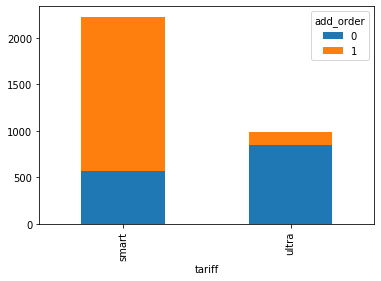

In [44]:
over = (df.pivot_table(index='tariff', columns='add_order', values='over_pay' , aggfunc='count'))
over.plot(stacked=True, kind='bar')

In [45]:
users_over = (df.groupby('tariff').sum()[['over_messgs', 'over_minutes', 'over_gb']])
display(users_over)

,over_messgs,over_minutes,over_gb
tariff,,,
smart,12928,92739,6714
ultra,0,0,795


Первое что мы видим - это больше всего пользователей из нашей выборки оплачивают тариф смарт, их чуть больше двух тысяч, тарифом ультра пользуется чуть меньше одной трети людей.
Но самое главное, что пользователи, у которых тариф ультра редко прибегают к дозаказам, а если и прибегают, то им не хватает только интернета, в то время как пользователи с тарифом смарт часто перерасходуют свой лимит и из-за этого доплачивают - здесь уже им не хватает не только гигабайтов, но и минут с смс.

# Шаг 3. Анализ данных
<a id='шаг3'></a>

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Для начала предпочту вывести медианные значения для каждого юзера по смс, минутам и гб:

In [46]:
medians = df.pivot_table(index=['user_id', 'tariff', 'city'], 
                         values=['session_gb', 'messages', 'duration'],
                         aggfunc='median')
display(medians)

,,,duration,messages,session_gb
user_id,tariff,city,,,
1000,ultra,Краснодар,339.0,65.0,14.5
1001,smart,Москва,422.0,0.0,16.5
1002,smart,Стерлитамак,214.0,11.0,18.0
1003,ultra,Москва,824.0,83.0,12.0
1004,ultra,Новокузнецк,132.5,154.5,18.0
...,...,...,...,...,...
1495,ultra,Иркутск,954.0,82.0,29.0
1496,smart,Вологда,524.0,41.5,24.0
1497,smart,Челябинск,490.0,17.0,14.0


Посмотрим сколько чаще всего пользователи с тарифом смарт платят: 

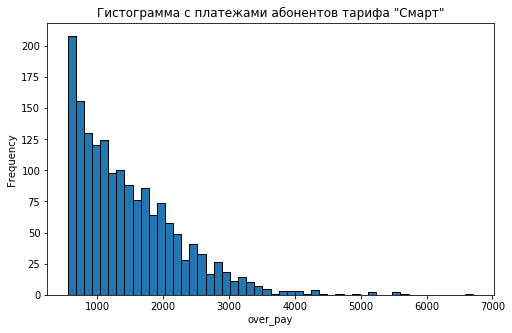

In [47]:
smart = df[(df['tariff'] == 'smart') & (df['over_pay'] > 550)]['over_pay']
smart.plot(kind='hist', ec='black', bins=50, figsize=(8, 5))
plt.title('Гистограмма с платежами абонентов тарифа "Смарт"')
plt.xlabel('over_pay')
plt.show()

Видно, что люди с тарифом смарт часто платят около 1000-1500р., есть даже те, кто может заплатить и 2000+р., посмотрим теперь на такой же график, только с тарифом ультра.

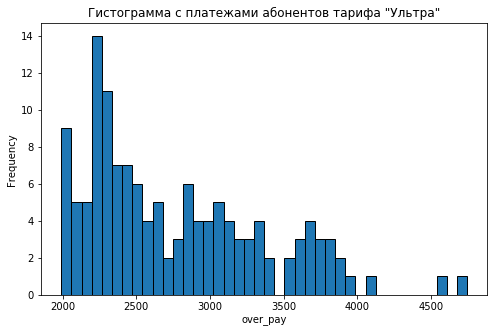

In [48]:
ultra = df[(df['tariff'] == 'ultra') & (df['over_pay'] > 1950 )]['over_pay']
ultra.plot(kind='hist', ec='black', bins=40, figsize=(8, 5))
plt.title('Гистограмма с платежами абонентов тарифа "Ультра"')
plt.xlabel('over_pay')
plt.show()

В ультре макисимальная переплата в сумме составлет около 2300-2500р, стоит обратить внимание что тут люди не так часто переплачивают (18 человек в ультре примерно на 2250р, против 170 человек примерное на 1200р) и не в таком кол-ве.

Теперь можно вывести города с сообщениями, звонками и скачанными гб и остортирвать их по убыванию, таким образом мы узнаем в каких городах больше всего люди выходят, например, в интернет (и может быть наш оператор сделает для этих городов скидку или какое нибудь вкусное предложение для привлечения новых пользователей?), в каких городах находятся самые общительные люди и мы узнаем их медианные минуты разговоров, ну и как вообще обстоят дела с смс - ими вообще пользуются?
Сортируем по городам, по убыванию, по медианному значению

In [49]:
over_internet = df.pivot_table(index='city', values='session_gb', aggfunc=['count', 'mean', 'median'])
over_internet.columns = ['count', 'mean', 'median']
over_internet = over_internet.sort_values('median', ascending=False)
display(over_internet)

,count,mean,median
city,,,
Чебоксары,20,22.750000,25.5
Мурманск,25,23.360000,24.0
Воронеж,39,24.948718,24.0
Саранск,22,24.181818,21.5
Кострома,24,20.250000,20.5
...,...,...,...
Нижневартовск,6,11.166667,11.0
Саратов,19,12.526316,11.0
Орёл,25,13.000000,9.0


In [50]:
over_messg = df.pivot_table(index='city', values='messages', aggfunc=['count', 'mean', 'median'])
over_messg.columns = ['count', 'mean', 'median']
over_messg = over_messg.sort_values('median', ascending=False)
display(over_messg)

,count,mean,median
city,,,
Кемерово,5,109.400000,148.0
Сургут,6,110.833333,122.0
Подольск,12,91.000000,91.0
Грозный,12,79.500000,84.0
Череповец,14,74.714286,76.0
...,...,...,...
Стерлитамак,16,7.937500,4.0
Барнаул,18,6.111111,3.0
Оренбург,13,19.692308,0.0


In [51]:
over_call = df.pivot_table(index='city', values='duration', aggfunc=['count', 'mean', 'median'])
over_call.columns = ['count', 'mean', 'median']
over_call = over_call.sort_values('median', ascending=False)
display(over_call)

,count,mean,median
city,,,
Кемерово,5,579.000000,705.0
Барнаул,18,606.000000,692.5
Тольятти,28,601.142857,671.5
Воронеж,39,667.025641,661.0
Тула,14,645.357143,648.5
...,...,...,...
Улан-Удэ,48,280.791667,271.5
Мурманск,25,259.840000,261.0
Астрахань,30,355.433333,256.0


In [52]:
display(df.head(2))

,user_id,month,duration,calls_count,session_mb,session_count,messages,age,churn_date,city,reg_date,tariff,session_gb,over_pay,over_messgs,over_minutes,over_gb,add_order
0,1000,5,159,17,2256.0,4,22,52,NaN,Краснодар,2018-05-25,ultra,3,1950,0,0,0,0
1,1000,6,172,28,23257.0,44,60,52,NaN,Краснодар,2018-05-25,ultra,23,1950,0,0,0,0


Настало время определения средних минут для наших пользователей, в добавок выведем медианные значения, стандартное отклонение и узнаем диспресию

In [53]:
#определяем медиану, среднее, диспресию и ст. откл для минут разговоров
duration_group = df.groupby('tariff').agg({'duration': ['count', 'median', 'mean', 'var', 'std']})
display(duration_group)

duration                                              
          count median        mean            var         std
tariff                                                       
smart      2229    422  417.934948   36219.315784  190.313730
ultra       985    518  526.623350  100873.633397  317.606098

In [54]:
#строим гистограммы
smart_gr = df[df['tariff'] == 'smart']['duration']
ultra_gr = df[df['tariff'] == 'ultra']['duration']

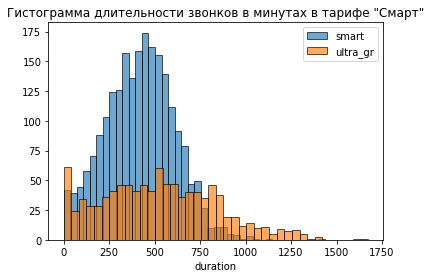

In [55]:
result = plt.hist(smart_gr, bins=40, edgecolor='k', alpha=0.65, label="smart")
result = plt.hist(ultra_gr, bins=40, edgecolor='k', alpha=0.65, label="ultra_gr")
plt.title('Гистограмма длительности звонков в минутах в тарифе "Смарт"')
plt.xlabel('duration')
plt.legend()
plt.show()

По минутам видно, что в тарифе ультра люди разговаривают немного больше, чем в смарте.
Небольшое наблюдение: Среднее значение\медиана гистограммы приходится примерно на середину размаха данных. Наивысшая частота оказывается в середине и постепенно снижается к обоим концам, т.о. она указывает на стабильность процесса, а такой "стабильный" процесс мы можем заметить у "смарта".

In [56]:
#определяем медиану, среднее, диспресию и ст. откл для смс
mess_group = df.groupby('tariff').agg({'messages': ['count', 'median', 'mean', 'var', 'std']})
display(mess_group)

messages                                          
          count median       mean          var        std
tariff                                                   
smart      2229     28  33.384029   796.812958  28.227876
ultra       985     38  49.363452  2285.266143  47.804457

In [57]:
mess_sm_gr = df[df['tariff'] == 'smart']['messages']
mess_ultr_gr = df[df['tariff'] == 'ultra']['messages']

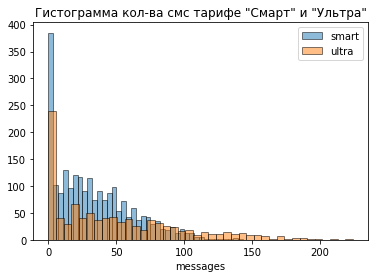

In [58]:
plt.hist(mess_sm_gr, bins=40, edgecolor='k', alpha=0.5, label='smart')
plt.hist(mess_ultr_gr, bins=40, edgecolor='k', alpha=0.5, label='ultra')
plt.legend(loc='upper right')
plt.title('Гистограмма кол-ва смс тарифе "Смарт" и "Ультра"')
plt.xlabel('messages')
plt.legend()
plt.show()

Графики по смс практически одинаковы. Охотнее всего отправляют смс абоненты с тарифом смарт, но тут все логично - их в целом больше абонентов с тарифом ультра. В любом случае похоже, что смс никому не нужны :(

In [59]:
#определяем медиану, среднее, диспресию и ст. откл для скачанных гб
gb_group = df.groupby('tariff').agg({'session_gb': ['count', 'median', 'mean', 'var', 'std']})
display(gb_group)

session_gb                                       
            count median       mean        var       std
tariff                                                  
smart        2229     17  16.359354  33.160304  5.758498
ultra         985     19  19.525888  97.334949  9.865848

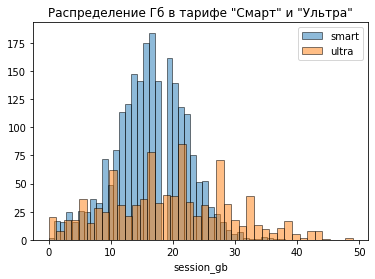

In [60]:
gb_smart_gr = df[df['tariff'] == 'smart']['session_gb']
gb_ultra_gr = df[df['tariff'] == 'ultra']['session_gb']
plt.hist(gb_smart_gr, bins=40, edgecolor='k', alpha=0.5, label='smart')
plt.hist(gb_ultra_gr, bins=40, edgecolor='k', alpha=0.5, label='ultra')
plt.legend(loc='upper right')
plt.title('Распределение Гб в тарифе "Смарт" и "Ультра"')
plt.xlabel('session_gb')
plt.legend()
plt.show()

В ультре разброс по гб чуть больше, чем в смарте: кто то скачивает до 50гб, в смарте примерное до 35. Медиана в смарте приходится на 17-18гб(что выше предела в данном тарифе), а в ультре на 19-20гб. Также у смарта вновь более или менее симметричная гистограмма, у ультры четко видны выступающие гб.

In [61]:
#определяем медиану, среднее, диспресию и ст. откл для итоговой суммы
cost_group = df.groupby('tariff').agg({'over_pay': ['count', 'median', 'mean', 'var', 'std']})
display(cost_group)

over_pay                                               
          count median         mean            var         std
tariff                                                        
smart      2229    959  1233.057873  620225.603023  787.544032
ultra       985   1950  2060.462944  126869.448067  356.187378

Самое инетерсное находится в столбце total_cost. Медианное значение в ультре составляет 1950 рублей - именно такая стоимость данного тарифа, среднее чуть больше медианы на 120р, т.е. в среднем люди платят в районе 2000-2070 рублей, в то время как люди с тарифом смарт переплачивают практически вдвое - медианное значени 1038р (против 550), а среднее значение около 1300.
Конечно выгоднее наверное просто доплатить и в сумме в месяц отдать 1000рублей за все (наверное большинство людей на это и расчитывают), чем сразу платить 2000р. Смарт в этом плане выгоднее.

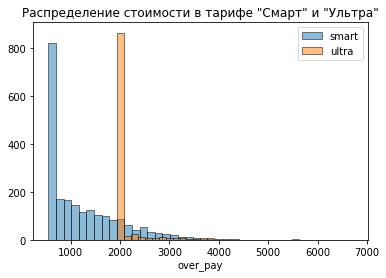

In [62]:
tariff_ultra_gr = df[df['tariff'] == 'ultra']['over_pay']
tariff_smart_gr = df[df['tariff'] == 'smart']['over_pay']

plt.hist(tariff_smart_gr, bins=40, edgecolor='k', alpha=0.5, label='smart')
plt.hist(tariff_ultra_gr, bins=20, edgecolor='k', alpha=0.5, label='ultra')
plt.legend(loc='upper right')
plt.title('Распределение стоимости в тарифе "Смарт" и "Ультра"')
plt.xlabel('over_pay')
plt.legend()
plt.show()

Хочется посмотреть, сколько в сумме заплатили люди с тарифом смарт и тарифом ультра. Мы уже знаем, что людей с тарифом ультра гораздо меньше, чем со смартом:

,over_pay
tariff,
smart,2748486
ultra,2029556


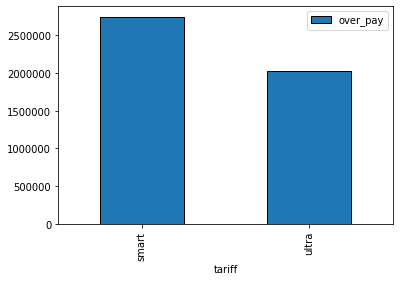

In [63]:
#выводим выручку с каждого тарифа
proceeds = df.pivot_table(index='tariff', values='over_pay', aggfunc='sum')
display(proceeds)
proceeds.plot(stacked=True, kind='bar', edgecolor='k')

In [64]:
#выводим кол-во людей с двух тарифов
df.pivot_table(index='tariff', values='user_id', aggfunc='count')

,user_id
tariff,
smart,2229
ultra,985


Получается, что ультрой пользуются 985 человек, а смартом 2229, но при всем этом, разница в выручке составляет в 800 тыс. И выходит, что для оператора выгоднее тариф ультра, т.к. ультра при своих 1\3 пользователей немного отрывается от смарта, смартом пользуется около 70% абонентов.

# Шаг 4. Проверка гипотез
<a id='шаг4'></a>

Сформулируем сразу все гипотезы, чтобы было понятно с чем необходимо работать:
H0: средняя выручка пользователей тарифов одинакова
H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
H0: средняя выручка пользователей из Москвы равна выручке пользователям из других городов
H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сперва определимся равна ли выручка разных тарифов друг другу:

In [65]:
ultra = df.query('tariff == "ultra"')['over_pay']
smart = df.query('tariff == "smart"')['over_pay']

alpha = .05
results = st.ttest_ind(ultra, 
    smart, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 



p-значение: 5.133013116078655e-296
Отвергаем нулевую гипотезу


Вывод: Мы отвергли нулевую гипотезу, т.е. выручки тарифом Смарт и Ультра не равны друг другу. Можем в этом убедиться:

In [66]:
proceeds = df.pivot_table(index='tariff', values='over_pay', )
display(proceeds)

,over_pay
tariff,
smart,1233.057873
ultra,2060.462944


Теперь точно видно, что средний ценник за тариф не равен друг другу. Все верно. Теперь нужно разобраться разная ли выручка между абонентами из Москвы и из других городов:

In [67]:
Moscow = df.query('city == "Москва"')['over_pay']
province = df.query('city != "Москва"')['over_pay']

alpha = .05
results = st.ttest_ind(Moscow, 
    province, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4546446281204245
Не получилось отвергнуть нулевую гипотезу


Хочу убедиться своими глазами, что абоненты из Мск и из периферии платят одинаково: 

In [68]:
Msc = (df[df['city'] == "Москва"]['over_pay']).mean()
print(Msc)
province = (df[df['city'] != "Москва"]['over_pay']).mean()
print(province)

1507.0671031096563
1481.8378793699578


Собственно видно, что разница в 26 рубля небольшая и можно сказать, что абоненты действительно платят +- из разных городов одинаково и Москва здесь не при чем.

In [69]:
Msc = (df[df['city'] == "Москва"]['over_pay']).var()
print(Msc)
province = (df[df['city'] != "Москва"]['over_pay']).var()
print(province)

547132.6987684795
630400.9683263237


# Шаг 5. Вывод
<a id='шаг5'></a>

Итак, люди в целом ведут себя по-разному на разных тарифах: например, минуты разговоров все таки различаются - на смарте в среднем говорят около 420 минут, а на ультре около 520(и разброс чуть больше). Также люди ведут себя по разному и с интернетом: в смарте ограничиваются в среднем в 16 гб, а на ультре практически в 20гб, разница все таки очевидна. Единственное, где мы можем заметить одинаковое поведение - это на графиках с смс, там люди ведут себя одинаково, смс почти никто не пользуется, отправляют примерно до 40-50 смс, а дальше все реже (и то наверное с просьбой перезвонить или абонент появился в сети). Также, оказывается, что абоненты из столицы и из других регионов платят одинаковые суммы, а за разные тарифы, логично, что платят не равные друг другу суммы.
- Т.о. можно сделать вывод, что пользователи с тарифом смарт регулярно выходят за рамки своего лимита и в результате доплачивают около 500-700 рублей, в то время как пользователи с тарифом ультра, наоборот, имеют большой запас минут для разговоров и Гб'ов и в основном не выходят за рамки, но они гарантированно переплачивают сразу.
- Самый выгодный тариф для оператора - это тариф ультра, здесь на людей может подействовать предложения оператора, мол вот вам 3000 минут, 1000 сообщений и 30гб мы не жадные, но стоит такой тариф около 2 тыс рублей, цена кусается и на такие условия идет мало людей (всего лишь одна треть из данных). В смарте все гораздо скромнее - 500 минут, 50 сообщений и 15гб и всего лишь 550рублей, но этот тариф предпочитает бОльшая часть людей. 
- Оператору выгоднее предлагать тариф ультра, т.к. в основном на смарте люди переплачивают всего лишь 500-700 рублей, т.о. они платят максимум 1300рублей, в то время как люди с тарифом ультра сразу гарантированно платят 1950, т.о. они еще больше переплачивают. К тому же у оператора есть большое преимущество - даже если вы говорили 2 секунды или 0.01 все будет идти не в пользу абонента, секунды округляются в большую сторону, поэтому и здесь оператор находится в плюсе. Как я уже отметила в среднем люди говорят около 420 минут на смарте (большая часть людей находится именно на этом тарифе), оператор может сократить минуты до 400, так люди постоянно будут перерасходывать свой лимит и регулярно доплачивать за свои минут (вариант для жадины-оператора), смс редко пользуются и 50 смс здесь вполне обоснованы, 15гб пожалуй золотая середина, в основном скачивают в районе 16-17гб. Стоит отметить, что конкуренты за базовый тариф предлагают около 5-10 гб, соответсвенно такие тарифы идут по минимальному прайсу и в основном от 600 рублей, но есть и от 400 рублей (привет 5 Гб!).
- Также оператор может уменьшить плату за 1 минуту, с 3 рублей понизить до 2 рублей и ограничиться 350 минутами, обосновав это тем, что у него самый минимальный прайс на рынке за базовый тариф. Но если посмотреть на конкурентов и что они предлагают, в основном это как раз от 400 минут (у некоторых даже 600! минут в самом дешевом тарифе), 15гб интернета, но такой тариф минимум стоит 600 рублей. Да и вообще +- базовый тариф стоит как раз от 600 рублей (у кого то 700, у кого то 900), поэтому нашему оператору можно либо смело рекомендовать поднять только стоимость смарта без изменений прочего, либо оставить эту стоимость, но немного поиграться с кол-вом минут и их стоимостью. Либо продвигать только тариф ультра, т.к. он больше всего принесет оператору выручки (но будут ли согласны люди отдавать сразу 2000р., зная, что они не израсходуют все пакеты и они сразу же 100% переплачивают?).
Самый выгодный для оператора тариф - однозначно, тариф ультра, но самый демократичный, благодаря которому люди продолжат пользоваться услугами - это смарт.